# Análise de Teoria dos Jogos: Halving Game

Este notebook apresenta a implementação e o estudo de estratégias ótimas para o **Halving Game**, um jogo de soma zero e informação perfeita. O objetivo é demonstrar a aplicação de algoritmos de busca adversária e técnicas de programação dinâmica para a resolução de jogos matemáticos.

<br>

## O Problema

O jogo consiste em manipular um número inteiro $N$ até que ele chegue a 0. Dois jogadores,  (Maximizador) e  (Minimizador), alternam turnos escolhendo uma de duas ações possíveis:

* **Decremento:** $N = N - 1$
* **Divisão:** $N = \lfloor N / 2 \rfloor$

**Condição de Vitória:** O jogador que realizar a jogada que resulta em $N = 0$ vence a partida.

<br>

## Abordagem Técnica

A solução foi construída utilizando padrões modernos inteligência artificial clássica:

* **Algoritmo Minimax:** Modelagem da árvore de decisão para garantir jogadas ótimas.
* **Poda Alpha-Beta (-):** Otimização da busca para reduzir o número de nós explorados na árvore de decisão.
* **Memoização:** Aplicação de cache de estados para evitar o reprocessamento de valores de  já calculados, reduzindo a complexidade de tempo de exponencial para linear em relação ao espaço de estados.

In [ ]:
# pip install matplotlib plotly

## Modelagem do problema

In [ ]:
from random import randint
from typing import Callable


# Definição de tipos
State = tuple[int, int]



class HalvingGame:
    """
    Representa a lógica e as regras do Halving Game.

    O jogo consiste em reduzir um número N até 0. Jogadores podem
    subtrair 1 ou dividir por 2 (floor division).
    """

    def __init__(self, n_start: int | None = None, max_n: int = 20):
        """
        Inicializa o jogo com um valor inicial.

        Args:
            n_start: Valor inteiro inicial. Se None, gera um valor aleatório.
            max_n: Valor máximo para a geração aleatória caso n_start seja None.
        """

        if n_start is None:
            n_start = randint(1, max_n)

        self.n_start: int = n_start


    def start_state(self) -> State:
        """
        Define o estado inicial do jogo.

        Returns:
            Uma tupla contendo (jogador_inicial, valor_inicial).
        """
        player = +1
        return (player, self.n_start)


    def is_end(self, state: State) -> bool:
        """
        Verifica se o jogo atingiu um estado terminal.

        Args:
            state: O estado atual (p, N).

        Returns:
            True se N for 0, indicando o fim da partida; False caso contrário.
        """
        _, n = state
        return n == 0


    def utility(self, state: State) -> float:
        """
        Calcula a utilidade do estado terminal.

        Args:
            state: O estado terminal (p, 0).

        Returns:
            Infinito positivo se P(+1) vencer, infinito negativo se P(-1) vencer.
        """
        p, n = state
        assert n == 0, "Utilidade só pode ser calculada em estados terminais."
        return p * float('inf')


    def actions(self, state: State) -> list[str]:
        """
        Retorna as ações possíveis para o estado dado.

        Args:
            state: O estado atual do jogo.

        Returns:
            Uma lista de strings contendo as ações possíveis: '-' ou '/'.
        """
        return ['-', '/']


    def player(self, state: State) -> int:
        """
        Retorna o jogador que deve agir no estado atual.

        Args:
            state: O estado atual.

        Returns:
            O identificador do jogador (+1 ou -1).
        """
        p, _ = state
        return p


    def successor(self, state: State, action: str) -> State:
        """
        Calcula o próximo estado após a aplicação de uma ação.

        Args:
            state: O estado atual antes da ação.
            action: A string representando a ação escolhida.

        Returns:
            O novo estado com o próximo jogador e o valor N atualizado.
        """

        p, n = state

        if action == '-':
            return (-p, n - 1)
        if action == '/':
            return (-p, n // 2)

        return state

In [ ]:
def human_policy(game: HalvingGame, state: State) -> str:
    """
    Política que solicita a entrada de um jogador humano via terminal.

    Args:
        game: A instância ativa do HalvingGame.
        state: O estado atual onde o humano deve tomar uma decisão.

    Returns:
        A string da ação validada escolhida pelo usuário.
    """

    valid_actions = game.actions(state)

    while True:
        action = input(f'P({state[0]}) {valid_actions}: ')
        if action in valid_actions:
            return action



def run_game(policies: dict[int, Callable[[HalvingGame, State], str]], n_start: int | None = None, max_n: int = 20) -> None:
    """
    Executa o loop principal de uma partida entre duas políticas de decisão.

    Args:
        policies: Dicionário mapeando os IDs dos jogadores às suas funções de decisão.
        n_start: Valor inteiro opcional para iniciar o jogo.
        max_n: Limite superior para N inicial caso n_start seja None.
    """

    game = HalvingGame(n_start, max_n)
    state = game.start_state()

    while not game.is_end(state):
        curr_player = game.player(state)
        print(f"{'='*10} Estado Atual: {state}")

        # Seleciona a política e decide a ação
        policy = policies[curr_player]
        action = policy(game, state)

        # Print detalhado do movimento
        print(f"Movimento: P({curr_player:+d}): '{action}'")

        # Transição de estado
        state = game.successor(state, action)

    vencedor, _ = state
    print(f"\n--- Fim de Jogo ---")
    print(f"Utilidade final: {game.utility(state)}")
    print(f"O jogador vencedor é: P({vencedor})")

In [ ]:
policies = {+1: human_policy, -1: human_policy}
run_game(policies, max_n=10)

========== Estado Atual: (1, 8)
P(1) ['-', '/']: /
Movimento: P(+1): '/'
========== Estado Atual: (-1, 4)
P(-1) ['-', '/']: -
Movimento: P(-1): '-'
========== Estado Atual: (1, 3)
P(1) ['-', '/']: -
Movimento: P(+1): '-'
========== Estado Atual: (-1, 2)
P(-1) ['-', '/']: -
Movimento: P(-1): '-'
========== Estado Atual: (1, 1)
P(1) ['-', '/']: -
Movimento: P(+1): '-'

--- Fim de Jogo ---
Utilidade final: -inf
O jogador vencedor é: P(-1)


## Algoritmo Minimax

O **Minimax** é um algoritmo de busca em árvore utilizado em teoria dos jogos para decisões em cenários de **soma zero** e **informação perfeita**. O objetivo fundamental é minimizar a perda máxima possível (daí o nome *Minimax*).

### Funcionamento Lógico

O algoritmo assume que ambos os jogadores jogam de forma ótima. Ele funciona de maneira recursiva:

* **Jogador Max (P(1)):** Tenta maximizar o valor da utilidade final.
* **Jogador Min (P(-1)):** Tenta minimizar o valor da utilidade final.

A decisão em cada estado  pode ser definida matematicamente como:

$$V(s) =
\begin{cases}
    Utility(s) & \text{, se } s \text{ é um estado terminal} \\
    \max_{a \in Actions(s)} V(Successor(s, a)) & \text{, se } Player(s) = +1 \\
    \min_{a \in Actions(s)} V(Successor(s, a)) & \text{, se } Player(s) = -1
\end{cases}$$


In [ ]:
def minimax_policy(game: HalvingGame, state: State) -> str:
    """
    Implementa a política Minimax pura para escolha de ações.

    Args:
        game: Instância do ambiente HalvingGame.
        state: O estado atual do jogo (p, N).

    Returns:
        A melhor ação calculada ('-' ou '/') baseada na utilidade futura.
    """

    # Função interna que implementa a recursão do Minimax
    def _get_value(current_state: State) -> float:

        # Se o jogo terminou neste estado, retorna a utilidade final
        if game.is_end(current_state):
            return game.utility(current_state)

        # Pega o jogador do estado atual
        player = game.player(current_state)

        # Gera os valores dos estados sucessores chamando a função recursivamente
        successor_values = []
        for action in game.actions(current_state):
            successor_state = game.successor(current_state, action)
            successor_values.append(_get_value(successor_state))

        # Se for o jogador P(+1), ele quer maximizar o resultado
        if player == 1:
            return max(successor_values)
        # Se for o jogador P(-1), ele quer minimizar o resultado
        else:
            return min(successor_values)

    # Obtém o jogador atual
    current_player = game.player(state)

    # Lista para armazenar as ações e os seus valores resultantes
    action_values: list[tuple[str, float]] = []

    # Itera sobre todas as ações possíveis a partir do estado atual
    for action in game.actions(state):
        # Calcula o estado que resultaria da aplicação da ação
        successor_state = game.successor(state, action)
        # Calcula o valor desse estado sucessor usando a função auxiliar
        value = _get_value(successor_state)
        action_values.append((action, value))

    # Escolhe a melhor ação com base no jogador atual
    if current_player == 1:
        # P(+1) é o Maximizador, então escolhe a ação com o maior valor
        best_action = max(action_values, key=lambda item: item[1])[0]
    else:
        # P(-1) é o Minimizador, então escolhe a ação com o menor valor
        best_action = min(action_values, key=lambda item: item[1])[0]

    return best_action

In [ ]:
# Definindo que ambos os jogadores usarão a estratégia MiniMax
policies = {+1: minimax_policy, -1: minimax_policy}
print(f"\n{'#'*10} Jogo IA (MiniMax) vs IA (MiniMax) {'#'*10}")
run_game(policies, n_start=50)

print("\n")

# Definindo um jogador humano contra uma IA utilizando a MiniMax
policies = {+1: human_policy, -1: minimax_policy}
print(f"{'#'*10} Jogo Humano vs IA (MiniMax) {'#'*10}")
run_game(policies, n_start=11)


########## Jogo IA (MiniMax) vs IA (MiniMax) ##########
========== Estado Atual: (1, 50)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 49)
Movimento: P(-1): '/'
========== Estado Atual: (1, 24)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 23)
Movimento: P(-1): '-'
========== Estado Atual: (1, 22)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 21)
Movimento: P(-1): '/'
========== Estado Atual: (1, 10)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 9)
Movimento: P(-1): '/'
========== Estado Atual: (1, 4)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 3)
Movimento: P(-1): '/'
========== Estado Atual: (1, 1)
Movimento: P(+1): '-'

--- Fim de Jogo ---
Utilidade final: -inf
O jogador vencedor é: P(-1)


########## Jogo Humano vs IA (MiniMax) ##########
========== Estado Atual: (1, 11)
P(1) ['-', '/']: /
Movimento: P(+1): '/'
========== Estado Atual: (-1, 5)
Movimento: P(-1): '-'
========== Estado Atual: (1, 4)
P(1) ['-', '/']: -
Movimento: P(+1): '-'
========== E

### Análise de diversas iterações: MiniMax vs MiniMax

In [ ]:
import time
import random
import sys


# Aumentando o limite de chamadas recursivas para suportar N maiores
sys.setrecursionlimit(2000)



def simular_jogo(n_start: int) -> int:
    """
    Simula uma partida completa entre dois agentes MiniMax de forma determinística.

    Args:
        n_start: O valor inteiro inicial de N para a simulação.

    Returns:
        O identificador do jogador vencedor (+1 ou -1) extraído do estado terminal.
    """

    # Ambos os jogadores usam a MiniMax
    policies = {+1: minimax_policy, -1: minimax_policy}

    game = HalvingGame(n_start=n_start)
    state = game.start_state()

    # Este é o loop principal do jogo, igual ao de run_game
    while not game.is_end(state):
        player = game.player(state)
        policy = policies[player]
        action = policy(game, state)
        state = game.successor(state, action)

    # No estado terminal (vencedor, 0), extraímos quem ganhou a partida
    vencedor, _ = state
    return vencedor

In [ ]:
# Registros para contar as vitórias
win_counts = {
    +1: 0,
    -1: 0
}

num_partidas = 10
historico_resultados: list[tuple[int, int]] = []
start_time = time.time()


print(f"{'#'*10} Iniciando Simulações Automáticas {'#'*10}\n")

# Loop para simular o jogo um certo número de vezes para valores aleatórios de N de 1 a 200
for i in range(num_partidas):
    n_aleatorio = random.randint(1, 200)

    # Executa a simulação
    vencedor = simular_jogo(n_aleatorio)
    historico_resultados.append((n_aleatorio, vencedor))
    win_counts[vencedor] += 1

    # Imprime o progresso de cada jogo com formatação de colunas
    print(f"Partida {i+1:02d} | N Inicial: {n_aleatorio:<3} | Vencedor: P({vencedor:+d})")

end_time = time.time()
total_time = end_time - start_time


# Exibição dos resultados finais formatada
print(f"\n{'='*35}")
print(f"{'RESUMO DA SIMULAÇÃO':^35}")
print(f"{'='*35}")
print(f"Tempo total de execução: {total_time:.2f} segundos")
print(f"Vitórias do Jogador P(+1): {win_counts[+1]}")
print(f"Vitórias do Jogador P(-1): {win_counts[-1]}")
print(f"{'='*35}")


# Conclusão final baseada na frequência de vitórias
if win_counts[+1] > win_counts[-1]:
    print("\nConclusão: O jogador P(+1) venceu a maioria das partidas.")
elif win_counts[-1] > win_counts[+1]:
    print("\nConclusão: O jogador P(-1) venceu a maioria das partidas.")
else:
    print("\nConclusão: Os jogadores empataram em número de vitórias.")

########## Iniciando Simulações Automáticas ##########

Partida 01 | N Inicial: 200 | Vencedor: P(-1)
Partida 02 | N Inicial: 43  | Vencedor: P(+1)
Partida 03 | N Inicial: 48  | Vencedor: P(+1)
Partida 04 | N Inicial: 141 | Vencedor: P(+1)
Partida 05 | N Inicial: 44  | Vencedor: P(+1)
Partida 06 | N Inicial: 158 | Vencedor: P(-1)
Partida 07 | N Inicial: 20  | Vencedor: P(+1)
Partida 08 | N Inicial: 172 | Vencedor: P(+1)
Partida 09 | N Inicial: 37  | Vencedor: P(+1)
Partida 10 | N Inicial: 145 | Vencedor: P(+1)

        RESUMO DA SIMULAÇÃO        
Tempo total de execução: 85.12 segundos
Vitórias do Jogador P(+1): 8
Vitórias do Jogador P(-1): 2

Conclusão: O jogador P(+1) venceu a maioria das partidas.


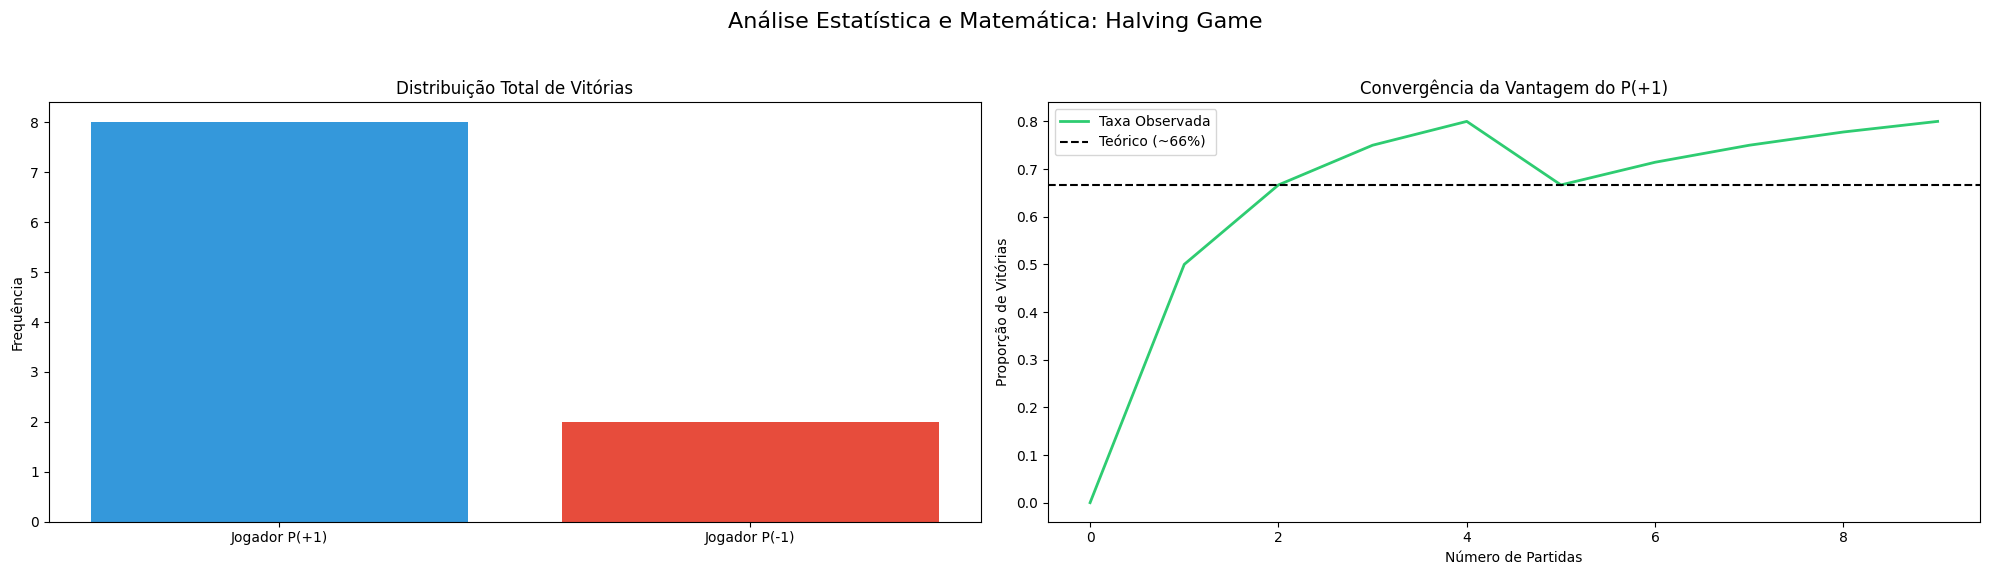

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go



def plot_dashboard(results: list[tuple[int, int]]) -> None:
    """Gera um dashboard com três análises visuais da simulação.

    Args:
        results: Lista de tuplas contendo (n_inicial, vencedor).
    """

    # Extração de dados para os gráficos
    n_values = [r[0] for r in results]
    winners = [r[1] for r in results]

    win_counts = {1: winners.count(1), -1: winners.count(-1)}


    # Configuração da figura
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle('Análise Estatística e Matemática: Halving Game', fontsize=16)


    # Gráfico de Barras: Total de Vitórias
    labels = ['Jogador P(+1)', 'Jogador P(-1)']
    ax1.bar(labels, [win_counts[1], win_counts[-1]], color=['#3498db', '#e74c3c'])
    ax1.set_title('Distribuição Total de Vitórias')
    ax1.set_ylabel('Frequência')


    # Gráfico de Convergência: Taxa de Vitória Acumulada (P+1)
    acc_wins = [1 if w == 1 else 0 for w in winners]
    win_rate = [sum(acc_wins[:i+1]) / (i+1) for i in range(len(acc_wins))]
    ax2.plot(win_rate, color='#2ecc71', linewidth=2, label='Taxa Observada')
    ax2.axhline(y=0.666, color='black', linestyle='--', label='Teórico (~66%)')
    ax2.set_title('Convergência da Vantagem do P(+1)')
    ax2.set_xlabel('Número de Partidas')
    ax2.set_ylabel('Proporção de Vitórias')
    ax2.legend()


    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



def plot_interactive_landscape(results: list[tuple[int, int]]) -> None:
    """Gera um gráfico interativo onde é possível ver os valores com o mouse."""
    sorted_res = sorted(results, key=lambda x: x[0])
    sn = [r[0] for r in sorted_res]
    sw = [r[1] for r in sorted_res]

    fig = go.Figure()

    # Linha de degrau
    fig.add_trace(go.Scatter(
        x=sn, y=sw, mode='lines', line=dict(shape='hv', color='#9b59b6'),
        name='Tendência', hoverinfo='skip'
    ))

    # Bolinhas interativas
    fig.add_trace(go.Scatter(
        x=sn, y=sw, mode='markers',
        marker=dict(
            size=10,
            color=sw,
            colorscale='RdBu',
            line=dict(width=1, color='black')
        ),
        text=[f"N = {n}<br>Vencedor: P({v:+d})" for n, v in sorted_res],
        hoverinfo='text',
        name='Estados'
    ))

    fig.update_layout(
        title='Landscape de N Interativo (Passe o mouse para ver os valores)',
        xaxis_title='Valor de N Inicial',
        yaxis=dict(tickmode='array', tickvals=[-1, 1], ticktext=['P(-1)', 'P(+1)']),
        height=500,
        template='plotly_white'
    )

    fig.show()



# Geração das visualizações
plot_dashboard(historico_resultados)
plot_interactive_landscape(historico_resultados)

O jogador P(+1) ganha mais jogos. Especificamente, ele ganha aproximadamente 2/3 das partidas, enquanto o jogador P(-1) ganha o 1/3 restante.

Isso acontece porque o jogador P(+1), por começar a jogar, tem a vantagem de poder, para muitos números N, fazer uma jogada que força o jogo para um "estado vencedor" para ele.

## Otimizações: Minimax com α-β Pruning e Memoization

Para tornar a busca viável em estados mais profundos, são utilizadas duas técnicas essenciais:

* **Poda Alpha-Beta (-):** Uma técnica que reduz o número de nós explorados na árvore de busca. Ela "poda" ramos que comprovadamente não influenciarão a decisão final por serem piores que opções já encontradas.

* **Memoização (Dynamic Programming):** Como o *Halving Game* possui muitos estados repetidos (subproblemas sobrepostos), o valor de cada estado $N$ é armazenado em cache após o primeiro cálculo. Isso reduz drasticamente a complexidade de tempo de exponencial para linear em relação ao espaço de estados.

In [ ]:
def minimax_policy_optimized(game: HalvingGame, state: State) -> str:
    """
    Implementa a política Minimax otimizada com Poda Alpha-Beta e Memoização.

    Args:
        game: Instância do ambiente HalvingGame.
        state: O estado atual do jogo (p, N).

    Returns:
        A melhor ação calculada ('-' ou '/') minimizando a exploração de nós desnecessários.
    """

    # Dicionário para armazenar estados já calculados (Memoização)
    memoria: dict[State, float] = {}

    def _get_value_full(current_state: State, alpha: float, beta: float) -> float:
        """
        Executa a busca recursiva com podas baseadas nos limites alpha e beta.

        Args:
            current_state: O estado sendo avaliado na recursão.
            alpha: O melhor valor (máximo) encontrado até agora para o jogador Max.
            beta: O melhor valor (mínimo) encontrado até agora para o jogador Min.

        Returns:
            O valor de utilidade calculado para o estado corrente.
        """

        # Se a resposta para tal estado já está na memória, a utiliza
        if current_state in memoria:
            return memoria[current_state]

        # Se o jogo terminou neste estado, retorna a utilidade final
        if game.is_end(current_state):
            return game.utility(current_state)

        # Pega o jogador do estado atual
        player = game.player(current_state)

        # Se for o jogador P(+1), ele quer maximizar o resultado
        if player == 1:
            # Começa com o pior valor para esse jogador
            value = float('-inf')

            # Explora cada ação possível a partir do estado atual
            for action in game.actions(current_state):
                successor_state = game.successor(current_state, action)

                # Alpha vai ser o maior valor no caminho até este ponto
                value = max(value, _get_value_full(successor_state, alpha, beta))
                alpha = max(alpha, value)

                # Se beta for menor ou igual a alpha, poda as ações
                if beta <= alpha:
                    break
            # Guarda o valor calculado na memória
            memoria[current_state] = value
            return value

        # Se for o jogador P(-1), ele quer minimizar o resultado
        else:
            # Começa com o pior valor para esse jogador
            value = float('inf')

            # Explora cada ação possível a partir do estado atual
            for action in game.actions(current_state):
                successor_state = game.successor(current_state, action)

                # Beta vai ser o maior valor no caminho até este ponto
                value = min(value, _get_value_full(successor_state, alpha, beta))
                beta = min(beta, value)

                # Se beta for menor ou igual a alpha, poda as ações
                if beta <= alpha:
                    break

            # Guarda o valor calculado na memória
            memoria[current_state] = value
            return value

    current_player = game.player(state)
    # A busca inicia com os piores valores para cada jogador
    alpha_inicial = float('-inf')
    beta_inicial = float('inf')

    action_values: list[tuple[str, float]] = []

    # Explora cada ação possível a partir do estado atual
    for action in game.actions(state):
        successor_state = game.successor(state, action)

        # Chama a função recursiva para avaliar o resultado de cada ação
        value = _get_value_full(successor_state, alpha_inicial, beta_inicial)
        action_values.append((action, value))

    if current_player == 1:
        # P(+1) é o Maximizador, então escolhe a ação com o maior valor
        best_action = max(action_values, key=lambda item: item[1])[0]
    else:
        # P(-1) é o Minimizador, então escolhe a ação com o menor valor
        best_action = min(action_values, key=lambda item: item[1])[0]

    return best_action

In [ ]:
# Definindo que ambos os jogadores usarão a estratégia MiniMax Otimizada
policies = {+1: minimax_policy_optimized, -1: minimax_policy_optimized}
print(f"\n{'#'*10} Jogo IA (Otimizada) vs IA (Otimizada) {'#'*10}")
run_game(policies, n_start=50)

print("\n")

# Definindo um jogador humano contra uma IA utilizando a MiniMax
policies = {+1: human_policy, -1: minimax_policy_optimized}
print(f"{'#'*10} Jogo Humano vs IA (Otimizada) {'#'*10}")
run_game(policies, n_start=11)


########## Jogo IA (Otimizada) vs IA (Otimizada) ##########
========== Estado Atual: (1, 50)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 49)
Movimento: P(-1): '/'
========== Estado Atual: (1, 24)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 23)
Movimento: P(-1): '-'
========== Estado Atual: (1, 22)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 21)
Movimento: P(-1): '/'
========== Estado Atual: (1, 10)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 9)
Movimento: P(-1): '/'
========== Estado Atual: (1, 4)
Movimento: P(+1): '-'
========== Estado Atual: (-1, 3)
Movimento: P(-1): '/'
========== Estado Atual: (1, 1)
Movimento: P(+1): '-'

--- Fim de Jogo ---
Utilidade final: -inf
O jogador vencedor é: P(-1)


########## Jogo Humano vs IA (Otimizada) ##########
========== Estado Atual: (1, 11)
P(1) ['-', '/']: -
Movimento: P(+1): '-'
========== Estado Atual: (-1, 10)
Movimento: P(-1): '-'
========== Estado Atual: (1, 9)
P(1) ['-', '/']: /
Movimento: P(+1): '/'
=====

### Análise otimizada de diversas iterações: MiniMax vs MiniMax

In [ ]:
import time
import random
import sys


# Aumentando o limite de chamadas recursivas
sys.setrecursionlimit(2000)



def simular_jogo_otimizado(n_start: int) -> int:
    """Simula uma partida entre dois agentes MiniMax otimizados.

    Args:
        n_start: O valor inteiro inicial de N.

    Returns:
        O identificador do jogador vencedor (+1 ou -1).
    """

    # Ambos os jogadores usam a política otimizada da MiniMax
    policies = {+1: minimax_policy_optimized, -1: minimax_policy_optimized}

    game = HalvingGame(n_start=n_start)
    state = game.start_state()

    # Este é o loop principal do jogo, igual ao de run_game
    while not game.is_end(state):
        player = game.player(state)
        policy = policies[player]
        action = policy(game, state)
        state = game.successor(state, action)

    vencedor = game.player(state)
    return vencedor



# Registos para contar as vitórias
win_counts = {
    +1: 0,
    -1: 0
}
historico_resultados_otimizados: list[tuple[int, int]] = []
start_time = time.time()


print(f"{'#'*10} Iniciando Simulação (N=1 até 1000) {'#'*10}\n")

# Loop para simular o jogo 1000 vezes para valores de N de 1 a 1000
for n in range(1, 1001):
    vencedor = simular_jogo_otimizado(n)
    historico_resultados_otimizados.append((n, vencedor))
    win_counts[vencedor] += 1
    # Imprime o progresso a cada 100 jogos
    if n % 100 == 0:
        print(f"Jogos simulados: {n}/1000...")

end_time = time.time()
total_time = end_time - start_time



print("\n--- Simulação Concluída! ---")
print(f"Tempo total de execução: {total_time:.2f} segundos")
print("===================================")
print(f"  Resultados após 1000 simulações  ")
print("===================================")
print(f"Vitórias do Jogador P(+1): {win_counts[+1]}")
print(f"Vitórias do Jogador P(-1): {win_counts[-1]}")
print("===================================")


# Conclusão final
if win_counts[+1] > win_counts[-1]:
    print("\nO jogador P(+1) ganhou mais jogos.")
elif win_counts[-1] > win_counts[+1]:
    print("\nO jogador P(-1) ganhou mais jogos.")
else:
    print("\nOs jogadores empataram no número de vitórias.")

########## Iniciando Simulação (N=1 até 1000) ##########

Jogos simulados: 100/1000...
Jogos simulados: 200/1000...
Jogos simulados: 300/1000...
Jogos simulados: 400/1000...
Jogos simulados: 500/1000...
Jogos simulados: 600/1000...
Jogos simulados: 700/1000...
Jogos simulados: 800/1000...
Jogos simulados: 900/1000...
Jogos simulados: 1000/1000...

--- Simulação Concluída! ---
Tempo total de execução: 15.31 segundos
  Resultados após 1000 simulações  
Vitórias do Jogador P(+1): 666
Vitórias do Jogador P(-1): 334

O jogador P(+1) ganhou mais jogos.


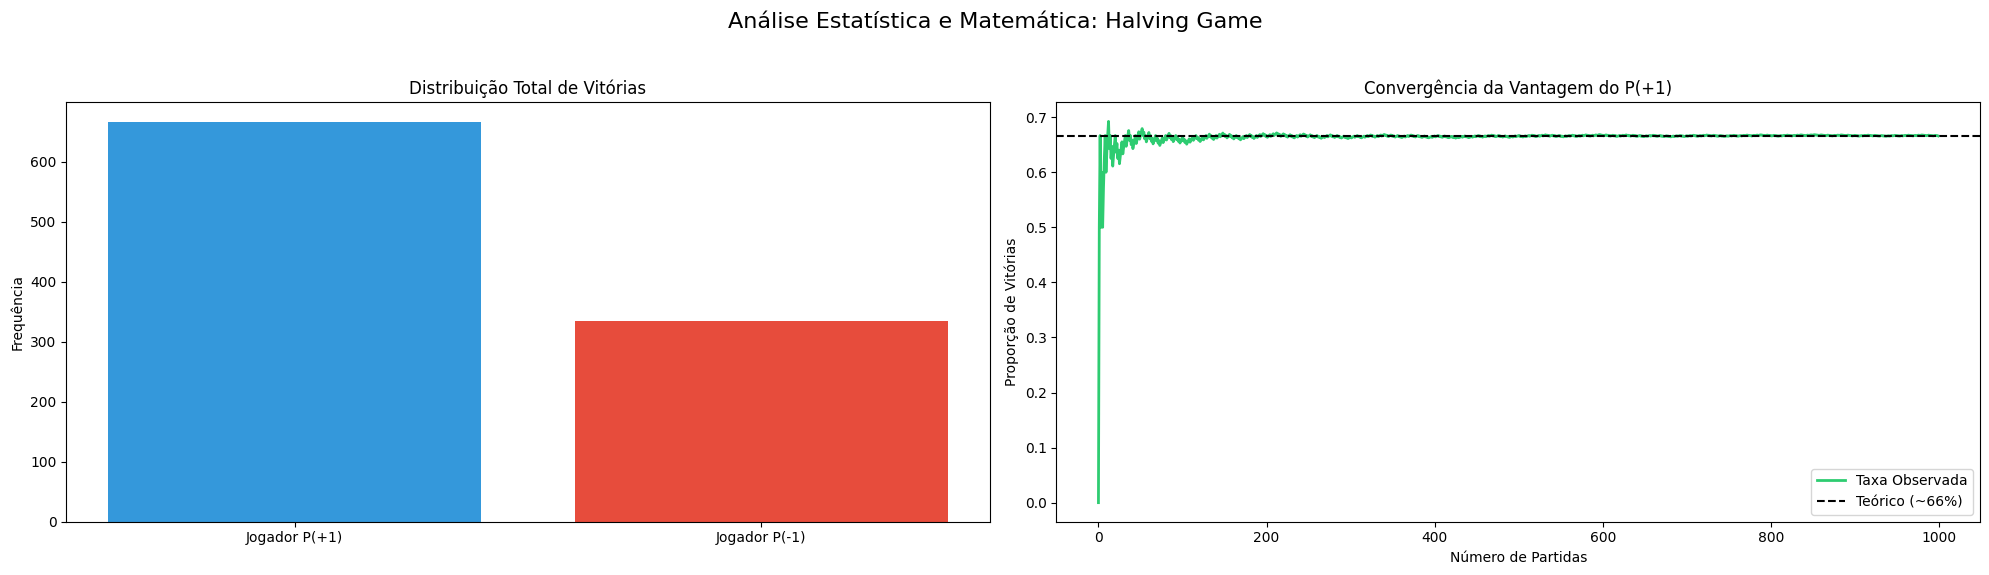

In [ ]:
# Geração das visualizações
plot_dashboard(historico_resultados_otimizados)
plot_interactive_landscape(historico_resultados_otimizados)

## Benchmark: comparação entre MiniMax Puro e MiniMax Otimizado

############### Performance Benchmark (N: 20 - 200) ###############

N     | Puro (s)     | Otimizado (s)   | Ganho (x)
-------------------------------------------------------
20    | 0.0011       | 0.000201        | 5.6x
40    | 0.0095       | 0.000225        | 42.3x
60    | 0.0457       | 0.000226        | 202.1x
80    | 0.1597       | 0.000457        | 349.7x
100   | 0.3421       | 0.000371        | 923.4x
120   | 0.7259       | 0.000433        | 1674.7x
140   | 1.7519       | 0.000681        | 2572.9x
160   | 3.8297       | 0.000654        | 5853.8x
180   | 8.7102       | 0.000690        | 12632.6x
200   | 15.5736      | 0.000837        | 18599.2x


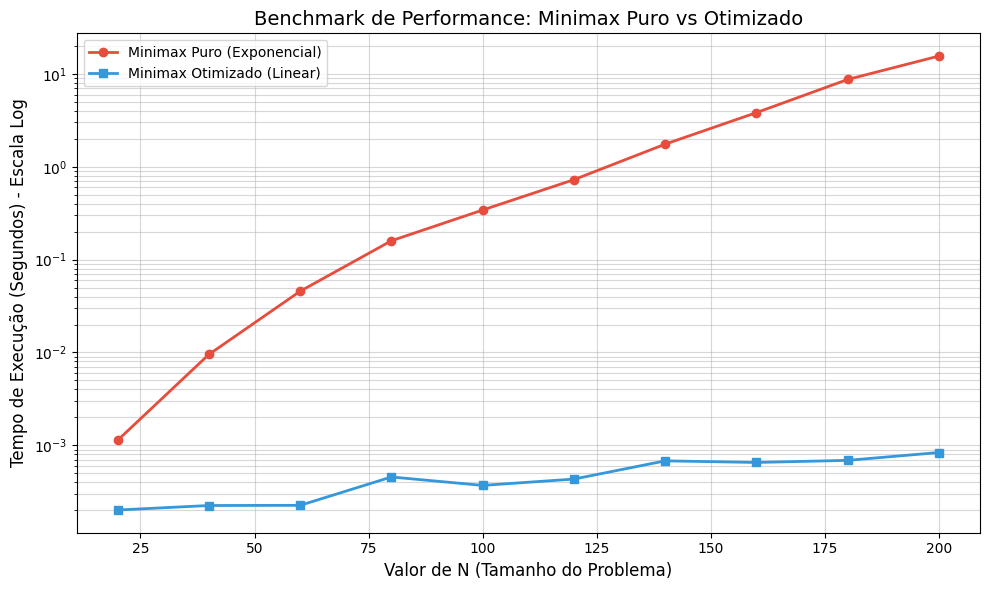

In [ ]:
import time


def run_performance_benchmark(n_start: int = 20, n_end: int = 200, step: int = 20) -> None:
    """
    Compara o tempo de execução entre as políticas de MiniMax para uma faixa de valores de N.
    Gera um gráfico comparativo.

    Analisa o impacto da escala na performance, demonstrando a diferença entre
    a complexidade exponencial e a linear.

    Args:
        n_start: Valor inicial de N para o benchmark.
        n_end: Valor final (inclusive) de N para o benchmark.
        step: Incremento entre cada teste.
    """

    n_values: list[int] = []
    tempos_puro: list[float | None] = []
    tempos_opt: list[float] = []

    print(f"{'#'*15} Performance Benchmark (N: {n_start} - {n_end}) {'#'*15}\n")
    print(f"{'N':<5} | {'Puro (s)':<12} | {'Otimizado (s)':<15} | {'Ganho (x)'}")
    print("-" * 55)

    for n in range(n_start, n_end + 1, step):
        game = HalvingGame(n_start=n)
        state = game.start_state()
        n_values.append(n)

        # Medição: Minimax Puro
        # Nota: Para N muito altos, o Minimax puro pode demorar muitos minutos
        inicio_puro = time.time()
        minimax_policy(game, state)
        tempo_puro = time.time() - inicio_puro
        tempos_puro.append(tempo_puro)
        puro_str = f"{tempo_puro:.4f}"


        # Medição: Minimax Otimizado
        inicio_opt = time.time()
        minimax_policy_optimized(game, state)
        tempo_opt = time.time() - inicio_opt
        tempos_opt.append(tempo_opt)


        # Cálculo de ganho
        ganho = f"{tempo_puro / tempo_opt:.1f}x"

        print(f"{n:<5} | {puro_str:<12} | {tempo_opt:<15.6f} | {ganho}")

    print(f"{'='*55}")


    # Geração de gráfico
    plt.figure(figsize=(10, 6))

    # Filtra valores None para plotar apenas onde o Minimax Puro rodou
    n_puro = [n for i, n in enumerate(n_values) if tempos_puro[i] is not None]
    val_puro = [t for t in tempos_puro if t is not None]

    plt.plot(n_puro, val_puro, 'o-', color='#e74c3c', label='Minimax Puro (Exponencial)', linewidth=2)
    plt.plot(n_values, tempos_opt, 's-', color='#3498db', label='Minimax Otimizado (Linear)', linewidth=2)

    plt.yscale('log') # Escala logarítmica para mostrar a diferença de ordens de grandeza
    plt.title('Benchmark de Performance: Minimax Puro vs Otimizado', fontsize=14)
    plt.xlabel('Valor de N (Tamanho do Problema)', fontsize=12)
    plt.ylabel('Tempo de Execução (Segundos) - Escala Log', fontsize=12)
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()



run_performance_benchmark()

## Conclusão

A análise experimental e teórica do **Halving Game** permitiu extrair insights valiosos sobre a aplicação de busca adversária em jogos de soma zero. Através da simulação de 1000 partidas sob jogo perfeito, chegamos às seguintes conclusões:


### 1. A Vantagem do Primeiro Jogador (First-Move Advantage)

A simulação demonstrou empiricamente que o jogo é desequilibrado em favor de quem inicia a partida.

* **Taxa de Vitória:** O jogador $P(+1)$ venceu exatamente **66,6%** das partidas, $P(-1)$ enquanto o jogador  venceu **33,4%**.
* **Determinismo:** Como o jogo é de informação perfeita e sem elementos estocásticos (após a definição de $N$), o vencedor é determinado inteiramente pelo valor inicial de $N$.


<br>

### 2. Eficiência Algorítmica e Otimização

A transição da política Minimax pura para a versão otimizada evidenciou a importância de técnicas de busca inteligente em Ciência da Computação:

* **Poda Alpha-Beta:** Reduziu o espaço de busca ao descartar ramos da árvore que não influenciavam o resultado final.

* **Memoização:** Foi o diferencial crítico para a performance. Ao transformar a árvore de busca em um **Grafo Acíclico Dirigido (DAG)**, o recalculo de estados repetidos é evitado e a complexidade sai de exponencial e torna-se linear, $O(N)$, pois cada valor de $N$ é calculado exatamente uma vez e armazenado em cache, permitindo processar 1000 partidas em aproximadamente **15 segundos**.


<br>

### 3. Análise de Performance e Escalabilidade

Os benchmarks realizados revelam o impacto drástico dessas otimizações conforme a escala do problema ($N$) aumenta:

* Explosão Exponencial: No Minimax puro, o tempo de execução saltou de 0.0011s ($N=20$) para 15.57s ($N=200$). Esse crescimento acelerado inviabiliza o uso do algoritmo original para problemas de grande porte.

* Estabilidade Otimizada: A versão com Memoização e Poda manteve-se extremamente eficiente, processando $N=200$ em apenas 0.0008s.

* Ganho de Performance: O benefício das otimizações escalou de forma impressionante, saindo de um ganho de 5.6x ($N=20$) para mais de 18.500x ($N=200$).


<br>

Esses resultados comprovam que a escolha correta de estruturas de dados e técnicas de poda não é apenas uma melhoria estética, mas um requisito fundamental para a viabilidade de sistemas de Inteligência Artificial em ambientes complexos.